In [18]:
# Import library
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
import graphviz
from sklearn.tree import export_graphviz
import matplotlib.pyplot as plt
import time
import os

In [19]:
# Load data

#data = pd.read_csv('Dataset/connect-4.data', header=None)
data = pd.read_csv('../Dataset/connect-4.data', header=None)
# Shuffle
data = shuffle(data)

# Split the data into features and labels
attribute = data.iloc[:, :-1]
classification = data.iloc[:, -1]

# Replace attribute into number
attribute = attribute.replace({'x': 1, 'o': 2, 'b': 3})

print(attribute)
print(classification)

       0   1   2   3   4   5   6   7   8   9   ...  32  33  34  35  36  37  \
6734    2   3   3   3   3   3   2   1   3   3  ...   3   3   3   3   3   3   
61407   2   1   2   1   1   3   1   3   3   3  ...   3   3   3   3   3   3   
41454   2   3   3   3   3   3   2   3   3   3  ...   3   3   3   3   1   1   
54439   3   3   3   3   3   3   1   1   1   2  ...   3   3   3   3   3   3   
53817   1   2   1   3   3   3   1   3   3   3  ...   3   3   3   3   2   2   
...    ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ...  ..  ..  ..  ..  ..  ..   
60041   3   3   3   3   3   3   1   1   2   1  ...   3   3   3   3   2   3   
33788   3   3   3   3   3   3   1   2   2   1  ...   3   3   3   3   2   3   
23650   2   1   3   3   3   3   3   3   3   3  ...   3   3   3   3   2   3   
54500   3   3   3   3   3   3   1   1   2   3  ...   2   1   3   3   3   3   
1439    3   3   3   3   3   3   2   1   2   1  ...   3   3   3   3   3   3   

       38  39  40  41  
6734    3   3   3   3  
61407   3   3  

In [20]:
visualize_prepare = "../Image/Visual_Preparing"
visualize_dtree = "../Image/Decision_Tree"

if not os.path.exists(visualize_prepare):
    os.makedirs(visualize_prepare)

if not os.path.exists(visualize_dtree):
    os.makedirs(visualize_dtree)

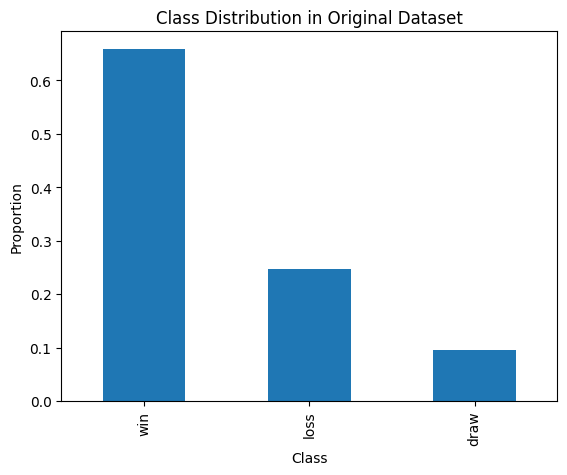

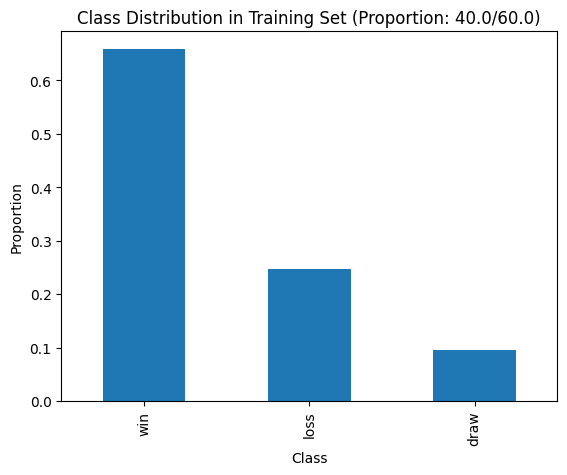

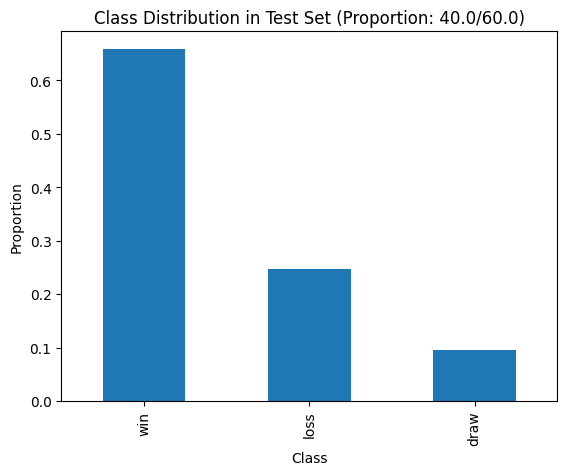

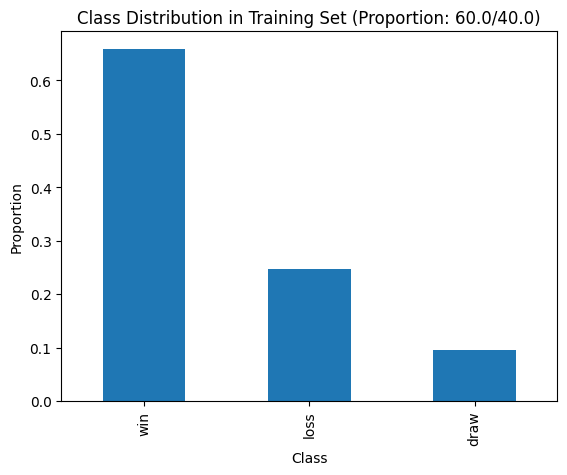

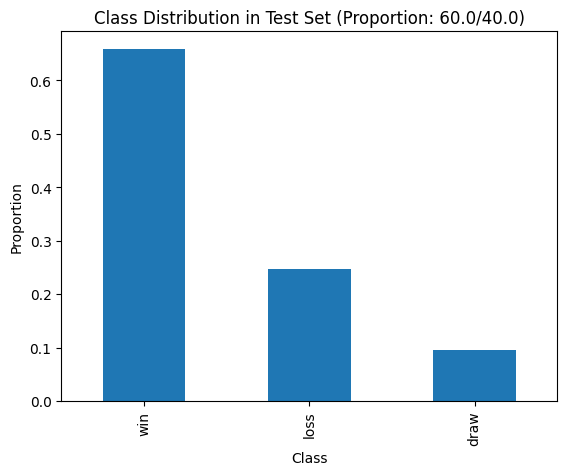

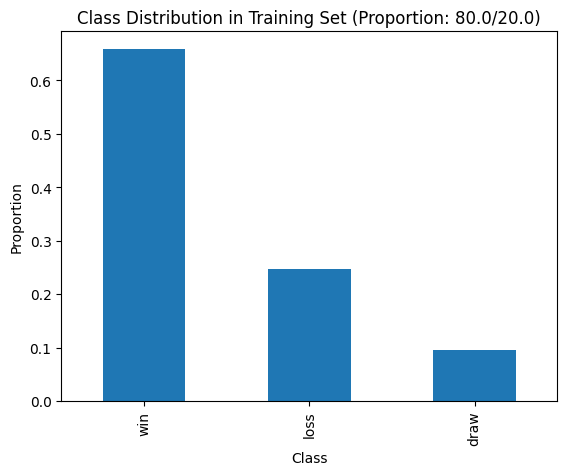

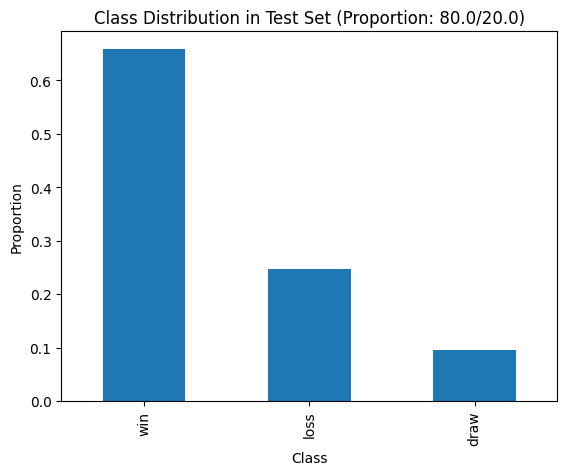

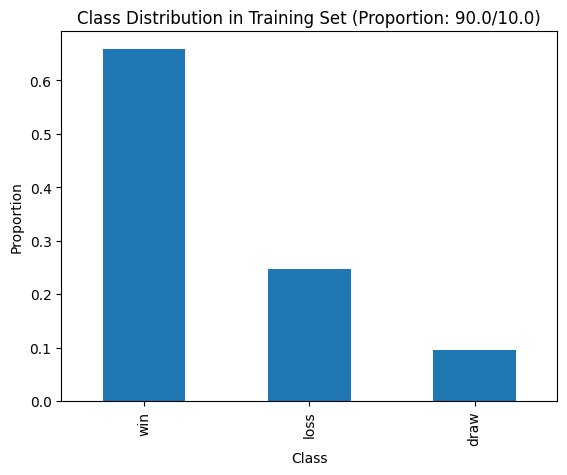

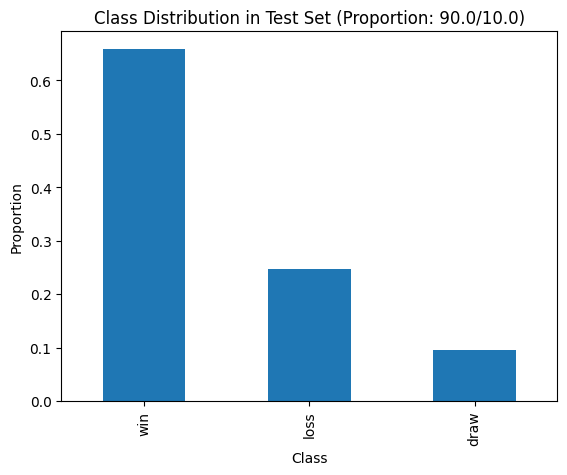

In [21]:
# Visualize the class distribution in the original dataset (the original Connect-4 dataset)
classification.value_counts(normalize=True).plot(kind='bar')
plt.title("Class Distribution in Original Dataset")
plt.xlabel("Class")
plt.ylabel("Proportion")
plt.savefig(f"{visualize_prepare}/original.pdf", format='pdf')
plt.show()

# Split the data into train and test sets with different proportions
train_test_proportion = [(0.4, 0.6), (0.6, 0.4), (0.8, 0.2), (0.9, 0.1)]

for i,proportion in enumerate(train_test_proportion):
    feature_train, feature_test, label_train, label_test = train_test_split(attribute, classification, train_size=proportion[0], test_size=proportion[1], stratify=classification)

    # Visualize the class distribution in the training set
    label_train.value_counts(normalize=True).plot(kind='bar')
    plt.title(f"Class Distribution in Training Set (Proportion: {proportion[0]*100}/{proportion[1]*100})")
    plt.xlabel("Class")
    plt.ylabel("Proportion")
    plt.savefig(f"{visualize_prepare}/{proportion}_train.pdf", format='pdf')
    plt.show()

    # Visualize the class distribution in the test set
    label_test.value_counts(normalize=True).plot(kind='bar')
    plt.title(f"Class Distribution in Test Set (Proportion: {proportion[0]*100}/{proportion[1]*100})")
    plt.xlabel("Class")
    plt.ylabel("Proportion")
    plt.savefig(f"{visualize_prepare}/{proportion}_test.pdf", format='pdf')
    plt.show()


In [33]:
for i,proportion in enumerate(train_test_proportion):
    start = time.time()
    feature_train, feature_test, label_train, label_test = train_test_split(attribute, classification, train_size=proportion[0], test_size=proportion[1], stratify=classification)

    # Building the decision tree classifiers
    decision_tree = DecisionTreeClassifier(criterion='entropy')
    decision_tree.fit(feature_train, label_train)

    # Predict the test set labels
    class_predict = decision_tree.predict(feature_test)

    # Evaluating the decision tree classifiers
    print(f"Train proportion: {proportion[0]*100}/{proportion[1]*100}")
    print(classification_report(label_test, class_predict))
    print(confusion_matrix(label_test, class_predict))
    print(f"Complete proportion {proportion[0]*100}/{proportion[1]*100}")
    print(f"Complete time: {time.time() - start} seconds")

    # Visualize the decision tree using graphviz
    print(f"Exporting Image dt_{proportion}.pdf...\n\n\n")
    export_img = export_graphviz(decision_tree, out_file=None, feature_names=attribute.columns, class_names=classification.unique(), filled=True, rounded=True, special_characters=True)
    graph = graphviz.Source(export_img)
    graph.render(f"{visualize_dtree}/dt_{proportion}")
    # You can comment above visualization if you don't want to wait


Train proportion: 40.0/60.0
              precision    recall  f1-score   support

        draw       0.21      0.23      0.22      3870
        loss       0.59      0.58      0.59      9981
         win       0.82      0.82      0.82     26684

    accuracy                           0.70     40535
   macro avg       0.54      0.54      0.54     40535
weighted avg       0.71      0.70      0.70     40535

[[  878  1129  1863]
 [ 1237  5790  2954]
 [ 1989  2866 21829]]
Complete proportion 40.0/60.0
Complete time: 1.4946982860565186 seconds
Train proportion: 60.0/40.0
              precision    recall  f1-score   support

        draw       0.24      0.24      0.24      2580
        loss       0.61      0.61      0.61      6654
         win       0.83      0.83      0.83     17789

    accuracy                           0.72     27023
   macro avg       0.56      0.56      0.56     27023
weighted avg       0.72      0.72      0.72     27023

[[  629   778  1173]
 [  818  4056  1780]
 [ 1

In [23]:
# The depth and accuracy of a decision tree
for depth in [None, 2, 3, 4, 5, 6, 7]:
    feature_train, feature_test, label_train, label_test = train_test_split(attribute, classification, test_size=0.2, stratify=classification)
    decision_tree = DecisionTreeClassifier(criterion='entropy', max_depth=depth)
    decision_tree.fit(feature_train, label_train)

    class_predict = decision_tree.predict(feature_test)
    print(f"Depth: {depth}")
    print(classification_report(label_test, class_predict))
    print(confusion_matrix(label_test, class_predict))

    # Visualize the decision tree using graphviz
    print(f"\n\nExporting Image dt_depth_{depth}.pdf...")
    export_img = export_graphviz(decision_tree, out_file=None, feature_names=attribute.columns, class_names=classification.unique(), filled=True, rounded=True, special_characters=True)
    graph = graphviz.Source(export_img)
    graph.render(f"{visualize_dtree}/dt_depth_{depth}")
    # You can comment above visualization if you don't want to wait


Depth: None
              precision    recall  f1-score   support

        draw       0.22      0.23      0.23      1290
        loss       0.63      0.62      0.62      3327
         win       0.84      0.83      0.84      8895

    accuracy                           0.72     13512
   macro avg       0.56      0.56      0.56     13512
weighted avg       0.73      0.72      0.73     13512

[[ 303  384  603]
 [ 433 2066  828]
 [ 618  854 7423]]
Depth: 2


c:\Users\PHAT\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\PHAT\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\PHAT\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

              precision    recall  f1-score   support

        draw       0.00      0.00      0.00      1290
        loss       0.48      0.14      0.22      3327
         win       0.68      0.96      0.79      8895

    accuracy                           0.66     13512
   macro avg       0.38      0.37      0.34     13512
weighted avg       0.56      0.66      0.58     13512

[[   0  120 1170]
 [   0  468 2859]
 [   0  396 8499]]
Depth: 3


c:\Users\PHAT\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\PHAT\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\PHAT\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

              precision    recall  f1-score   support

        draw       0.00      0.00      0.00      1290
        loss       0.61      0.04      0.07      3327
         win       0.66      0.99      0.80      8895

    accuracy                           0.66     13512
   macro avg       0.42      0.34      0.29     13512
weighted avg       0.59      0.66      0.54     13512

[[   0   24 1266]
 [   0  122 3205]
 [   0   54 8841]]
Depth: 4


c:\Users\PHAT\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\PHAT\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\PHAT\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

              precision    recall  f1-score   support

        draw       0.00      0.00      0.00      1290
        loss       0.52      0.23      0.32      3327
         win       0.69      0.94      0.80      8895

    accuracy                           0.67     13512
   macro avg       0.40      0.39      0.37     13512
weighted avg       0.58      0.67      0.60     13512

[[   0  155 1135]
 [   0  766 2561]
 [   0  555 8340]]
Depth: 5


c:\Users\PHAT\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\PHAT\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\PHAT\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

              precision    recall  f1-score   support

        draw       0.00      0.00      0.00      1290
        loss       0.52      0.26      0.35      3327
         win       0.70      0.93      0.80      8895

    accuracy                           0.68     13512
   macro avg       0.41      0.40      0.38     13512
weighted avg       0.59      0.68      0.61     13512

[[   0  187 1103]
 [   0  858 2469]
 [   0  601 8294]]
Depth: 6


c:\Users\PHAT\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\PHAT\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\PHAT\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

              precision    recall  f1-score   support

        draw       0.00      0.00      0.00      1290
        loss       0.57      0.30      0.39      3327
         win       0.71      0.94      0.81      8895

    accuracy                           0.69     13512
   macro avg       0.43      0.41      0.40     13512
weighted avg       0.61      0.69      0.63     13512

[[   0  176 1114]
 [   0 1003 2324]
 [   0  573 8322]]
Depth: 7
              precision    recall  f1-score   support

        draw       0.36      0.00      0.01      1290
        loss       0.60      0.34      0.44      3327
         win       0.72      0.93      0.81      8895

    accuracy                           0.70     13512
   macro avg       0.56      0.43      0.42     13512
weighted avg       0.65      0.70      0.64     13512

[[   5  198 1087]
 [   2 1144 2181]
 [   7  576 8312]]


In [24]:
# from google.colab import files
# !zip -r /content/sample_data/Dataset/LAB_AI.zip /content/sample_data/Dataset/Visual_Preparing /content/sample_data/Dataset/Decision_Tree
# files.download('/content/sample_data/Dataset/LAB_AI.zip')